# 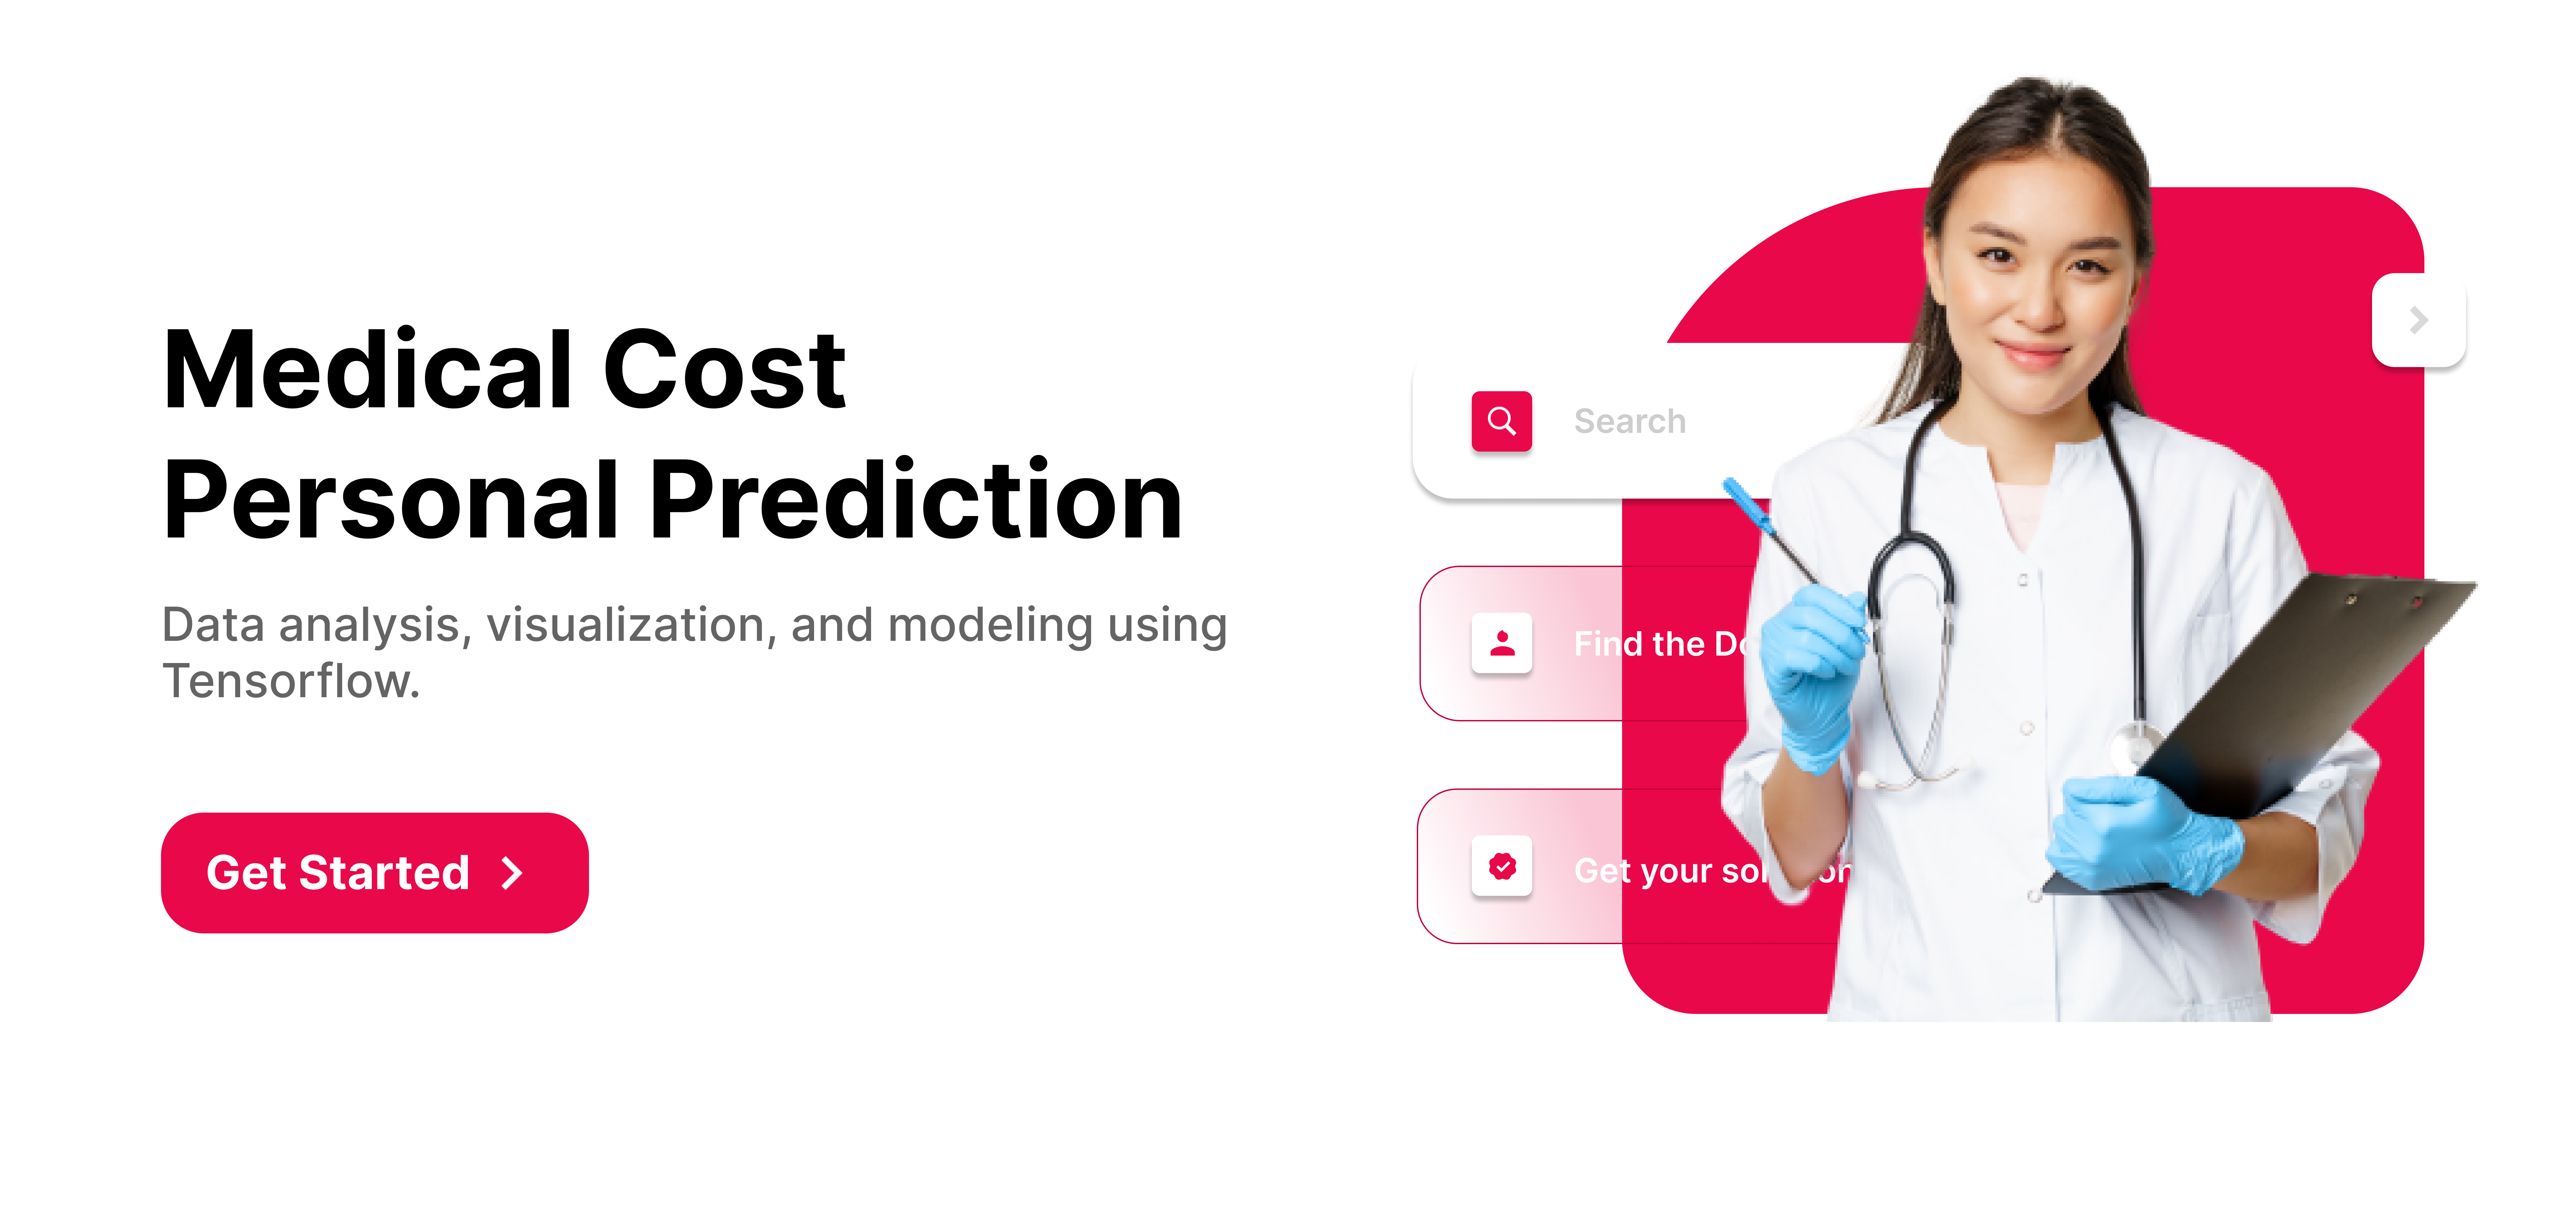Medical Health Expense Prediction System

# Importing Dependencies Here

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams['figure.figsize']=(16,5)
plt.style.use('fivethirtyeight')

# Data Set

In [ ]:
data=pd.read_csv('insurance.csv')
print(data)
data.shape
data.columns


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Data Visualization

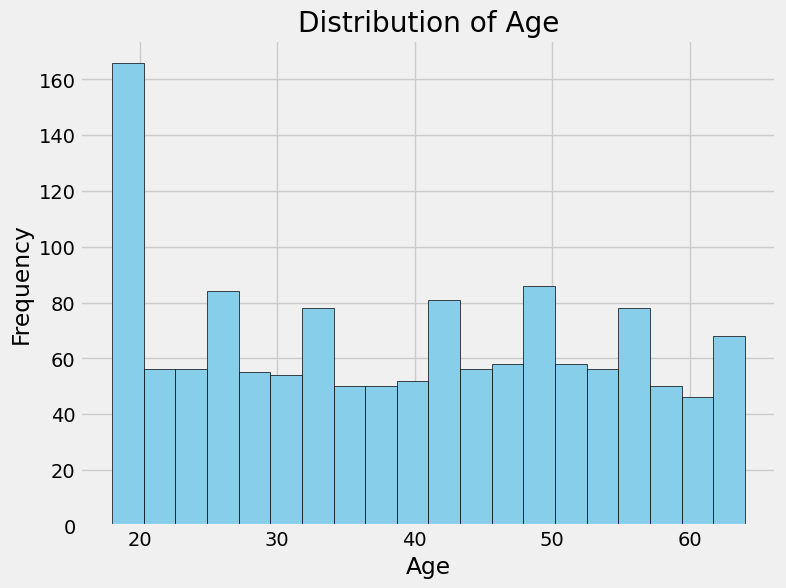

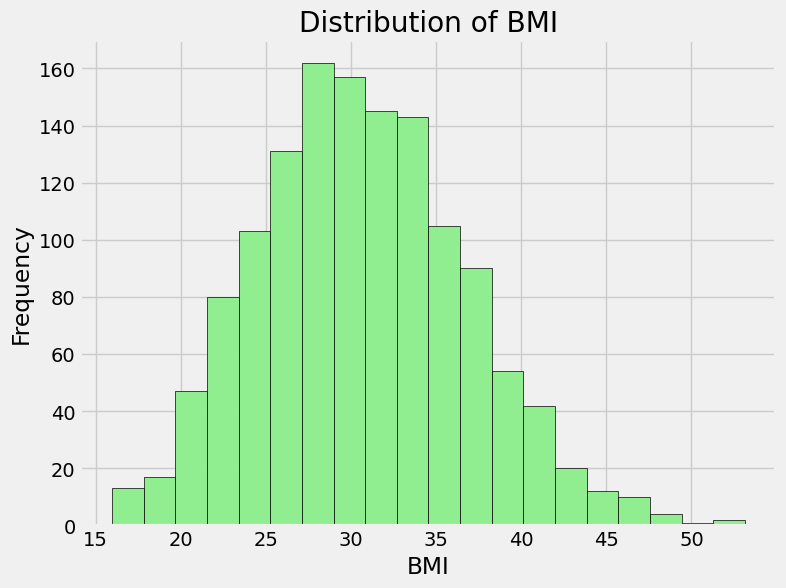

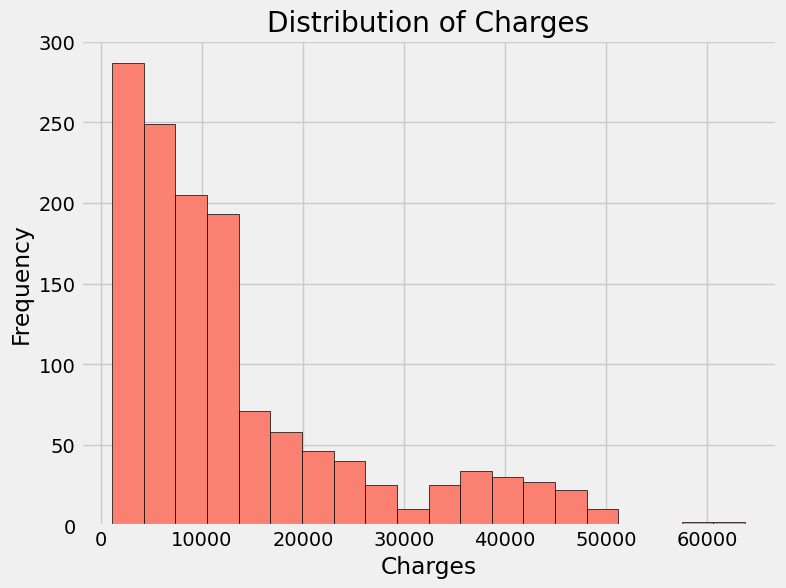

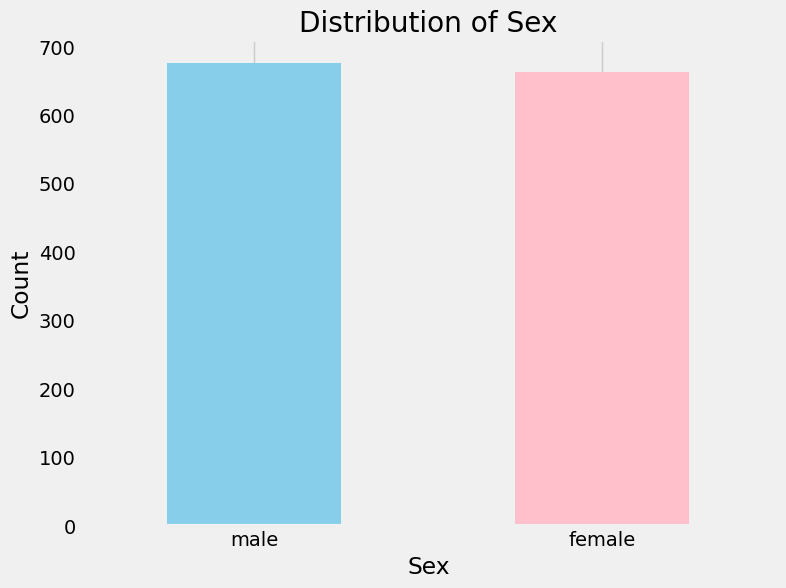

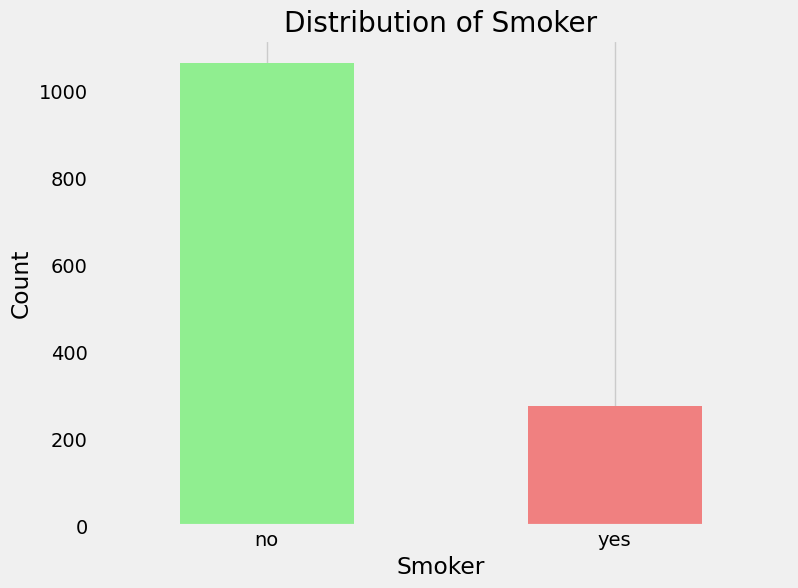

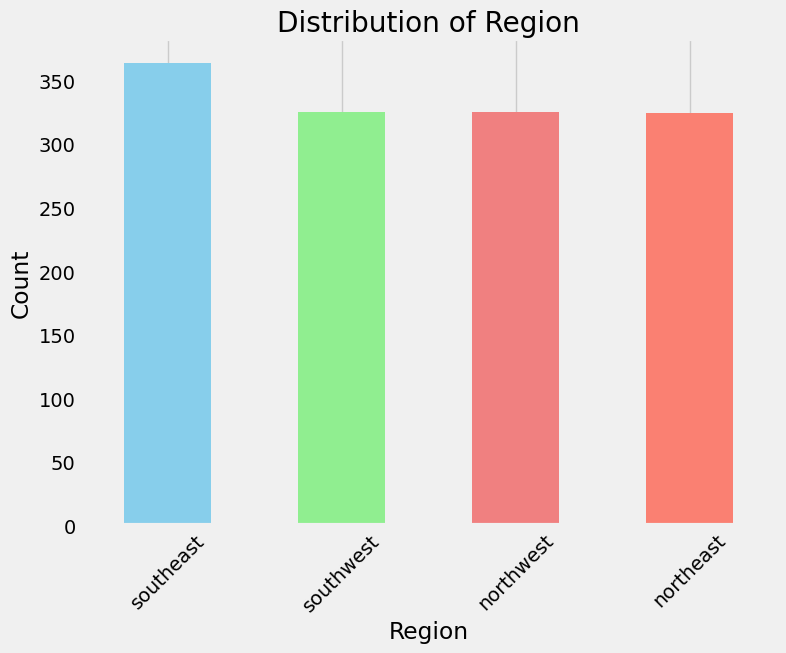

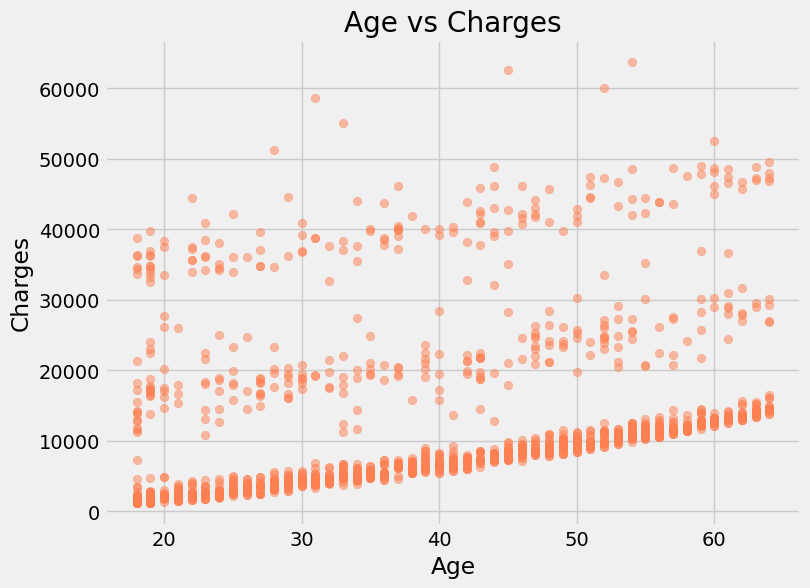

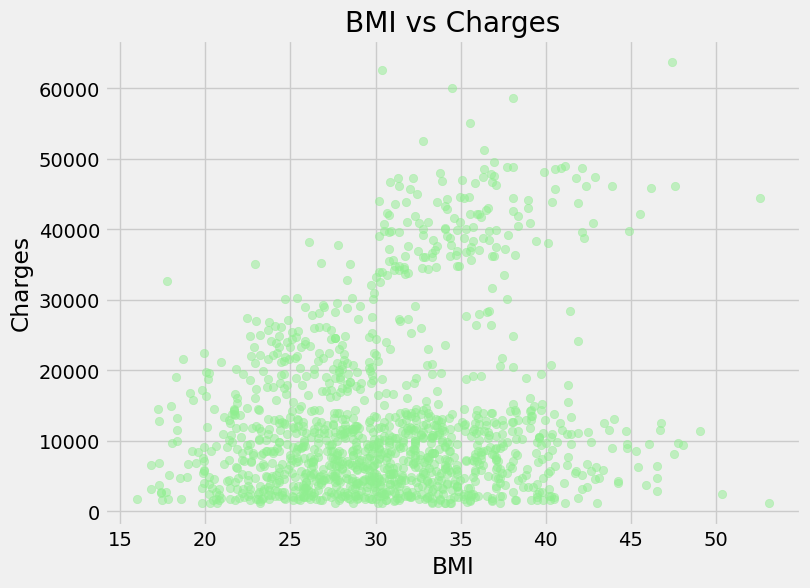

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
insurance_data = pd.read_csv("insurance.csv")

# 1. Histogram for Age
plt.figure(figsize=(8, 6))
plt.hist(insurance_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Histogram for BMI
plt.figure(figsize=(8, 6))
plt.hist(insurance_data['bmi'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. Histogram for Charges
plt.figure(figsize=(8, 6))
plt.hist(insurance_data['charges'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 4. Bar chart for Sex
sex_counts = insurance_data['sex'].value_counts()
plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# 5. Bar chart for Smoker
smoker_counts = insurance_data['smoker'].value_counts()
plt.figure(figsize=(8, 6))
smoker_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Distribution of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# 6. Bar chart for Region
region_counts = insurance_data['region'].value_counts()
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'salmon'])
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 7. Scatter plot for Age vs Charges
plt.figure(figsize=(8, 6))
plt.scatter(insurance_data['age'], insurance_data['charges'], color='coral', alpha=0.5)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# 8. Scatter plot for BMI vs Charges
plt.figure(figsize=(8, 6))
plt.scatter(insurance_data['bmi'], insurance_data['charges'], color='lightgreen', alpha=0.5)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# Data Set Preprocessing Part

In [ ]:
data['sex']=data['sex'].replace(('male','female'),(2,1))
data['smoker']=data['smoker'].replace(('yes','no'),(2,1))
data['region']=data['region'].replace(('southeast','southwest','northeast','northwest'),(2,1,1,1))
data.select_dtypes('object').columns

Index([], dtype='object')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,2,1,16884.92400
1,18,2,33.770,1,1,2,1725.55230
2,28,2,33.000,3,1,2,4449.46200
3,33,2,22.705,0,1,1,21984.47061
4,32,2,28.880,0,1,1,3866.85520


In [ ]:
y=data['charges']
x=data.drop(['charges'],axis=1)
print(y.shape)
print(x.columns)

(1338,)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

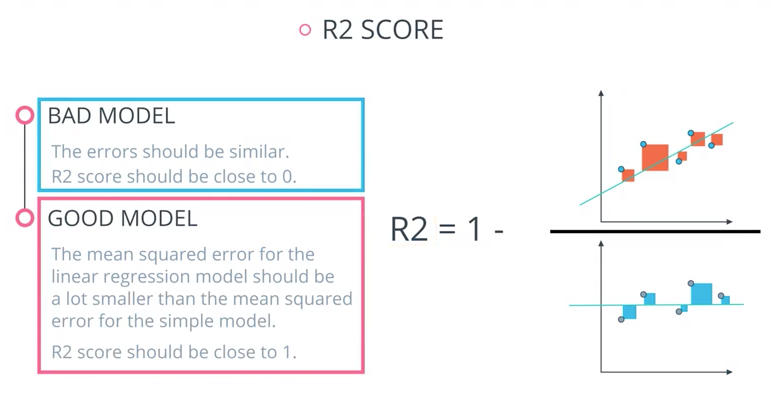

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
mse=mean_squared_error(y_test,y_pred1)
rmse=np.sqrt(mse)
print('RMSE Score: ',rmse)
r2_score=r2_score(y_test,y_pred1)
print('R2 Score: ',r2_score)

RMSE Score:  5663.905095557446
R2 Score:  0.7984048983399955


# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(x_train, y_train)
y_pred2=model2.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
mse=mean_squared_error(y_test,y_pred2)
rmse=np.sqrt(mse)
print('RMSE Score: ',rmse)
r2_score=r2_score(y_test,y_pred2)
print('R2 Score: ',r2_score)

RMSE Score:  4407.438674572186
R2 Score:  0.8779267248816933


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model3=GradientBoostingRegressor()
model3.fit(x_train, y_train)
y_pred3=model3.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
mse=mean_squared_error(y_test,y_pred3)
rmse=np.sqrt(mse)
print('RMSE Score: ',rmse)
r2_score=r2_score(y_test,y_pred3)
print('R2 Score: ',r2_score)

RMSE Score:  4063.942272987806
R2 Score:  0.8962129660739513


SUPPORT VECTOR MACHINE(SVM)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initializing Support Vector Regression (SVR) model
model4 = SVR()

# Training the model
model4.fit(x_train, y_train)

# Making predictions
y_pred4 = model4.predict(x_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred4)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('RMSE Score(SVM):', rmse)

# Calculating R2 Score
r2 = r2_score(y_test, y_pred4)
print('R2 Score(SVM):', r2)

RMSE Score(SVM): 13232.864496579852
R2 Score(SVM): -0.1004131480303645


XGB Regressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize XGBoost Regressor model
model_xgb = XGBRegressor()

# Train the model
model_xgb.fit(x_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate Root Mean Squared Error (RMSE)
rmse_xgb = np.sqrt(mse_xgb)
print('RMSE Score (XGBoost):', rmse_xgb)

# Calculate R2 Score
r2_xgb = r2_score(y_test, y_pred_xgb)
print('R2 Score (XGBoost):', r2_xgb)


RMSE Score (XGBoost): 4655.502075820324
R2 Score (XGBoost): 0.8637987512741727


In [ ]:
import pandas as pd
# Compute the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019 -0.011642  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.017117  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.270025  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673 -0.023066  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.068498  0.787251
region   -0.011642  0.017117  0.270025 -0.023066  0.068498  1.000000  0.073982
charges   0.299008  0.057292  0.198341  0.067998  0.787251  0.073982  1.000000


MODEL EVALUATION

In [ ]:
import pandas as pd

# Load the dataset
insurance_data = pd.read_csv("insurance.csv")

# Check for missing values
missing_values = insurance_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Handle missing values
# For demonstration purposes, let's fill missing numerical values with the mean
# and missing categorical values with the mode

# Fill missing numerical values with mean
numerical_cols = insurance_data.select_dtypes(include=['number']).columns
insurance_data[numerical_cols] = insurance_data[numerical_cols].fillna(insurance_data[numerical_cols].mean())

# Fill missing categorical values with mode
categorical_cols = insurance_data.select_dtypes(include=['object']).columns
insurance_data[categorical_cols] = insurance_data[categorical_cols].fillna(insurance_data[categorical_cols].mode().iloc[0])

# Check if missing values are handled
missing_values_after_handling = insurance_data.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after_handling)

# Save the processed dataset
insurance_data.to_csv("insurance_processed.csv", index=False)


Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Missing values after handling:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df = pd.get_dummies(df, columns=['sex','smoker','region'],drop_first=True)

In [ ]:
df.head(3)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,False,True,False,False,True
1,18,33.77,1,1725.5523,True,False,False,True,False
2,28,33.00,3,4449.4620,True,False,False,True,False


In [ ]:
y = df['charges']
x = df.drop('charges',axis=1)

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=19,train_size=0.7)

In [ ]:
lm=LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- region
- sex
- smoker
Feature names seen at fit time, yet now missing:
- region_northeast
- region_northwest
- region_southeast
- region_southwest
- sex_female
- ...


In [ ]:
model.score(x_train,y_train)

0.7538319331970216

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


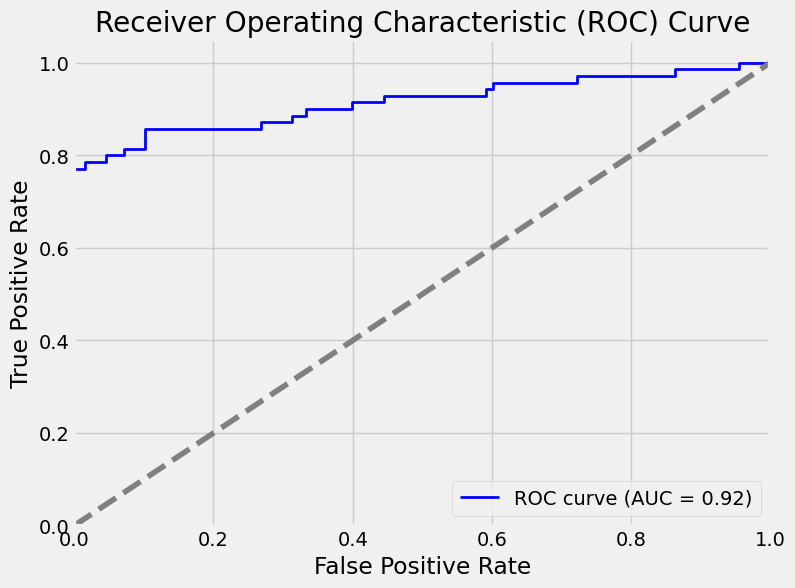

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
insurance_data = pd.read_csv("insurance.csv")

# Let's convert the problem into a binary classification task
# For example, we can set a threshold to classify charges as high or low
threshold = 15000  # Example threshold

# Create a binary target variable based on the threshold
insurance_data['charge_category'] = (insurance_data['charges'] > threshold).astype(int)

# Preprocessing: Convert categorical variables to numerical using one-hot encoding
insurance_data = pd.get_dummies(insurance_data)

# Define features (X) and target variable (y)
X = insurance_data.drop(columns=['charges', 'charge_category'])
y = insurance_data['charge_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [ ]:
pip install pandas scikit-learn xgboost


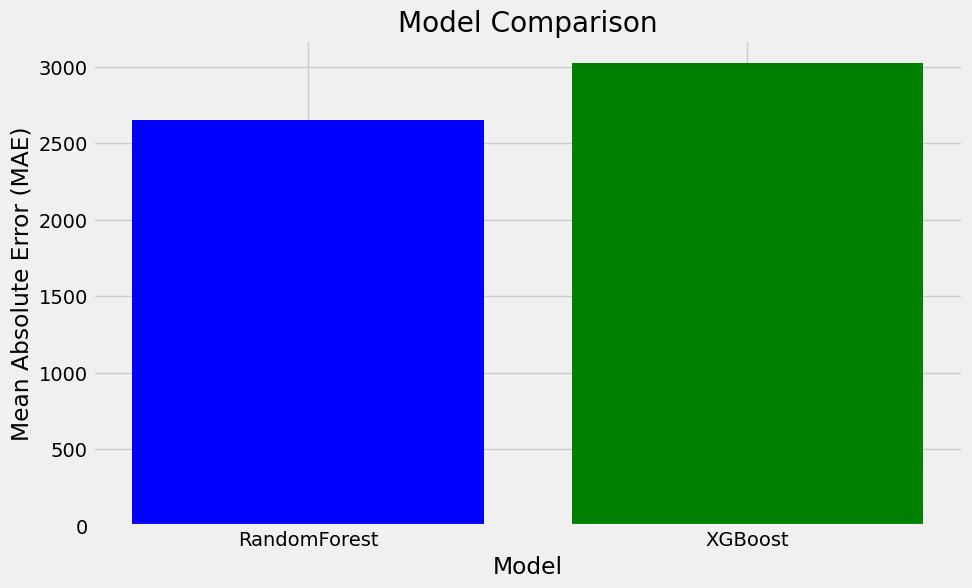

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load the dataset
data = pd.read_csv('insurance.csv')

# Split features and target variable
X = data.drop(columns=['charges'])
y = data['charges']

# Define preprocessing steps for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models to evaluate
models = [
    ('RandomForest', RandomForestRegressor()),
    ('XGBoost', XGBRegressor())
]

# Evaluate each model using cross-validation
results = {}
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    scores = -cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=5)
    results[name] = scores.mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv('insurance.csv')

# Split features and target variable
X = data.drop(columns=['charges'])
y = data['charges']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Support Vector Machine (SVM)
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='linear'))
])
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Linear Regression
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for SVM
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

# Calculate evaluation metrics for Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Calculate evaluation metrics for Random Forest
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print results
print("Support Vector Machine (SVM):")
print(f'Root Mean Squared Error (RMSE): {rmse_svm:.2f}')
print(f'Mean Squared Error (MSE): {mse_svm:.2f}')
print(f'Mean Absolute Error (MAE): {mae_svm:.2f}')
print("\nLinear Regression:")
print(f'Root Mean Squared Error (RMSE): {rmse_lr:.2f}')
print(f'Mean Squared Error (MSE): {mse_lr:.2f}')
print(f'Mean Absolute Error (MAE): {mae_lr:.2f}')
print("\nRandom Forest:")
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print(f'Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')


Support Vector Machine (SVM):
Root Mean Squared Error (RMSE): 12678.22
Mean Squared Error (MSE): 160737190.05
Mean Absolute Error (MAE): 8219.64

Linear Regression:
Root Mean Squared Error (RMSE): 5796.28
Mean Squared Error (MSE): 33596915.85
Mean Absolute Error (MAE): 4181.19

Random Forest:
Root Mean Squared Error (RMSE): 4582.97
Mean Squared Error (MSE): 21003637.61
Mean Absolute Error (MAE): 2541.61
